# Intro to Networkx

## Подготoвка

In [1]:
!pip3 install networkx

You should consider upgrading via the '/Users/Alexey.Zhebel/bin/python -m pip install --upgrade pip' command.


In [91]:
!pip3 install scipy

  Using cached scipy-1.7.3-cp38-cp38-macosx_10_9_x86_64.whl (33.0 MB)
You should consider upgrading via the '/Users/Alexey.Zhebel/bin/python -m pip install --upgrade pip' command.


In [6]:
# imports

import networkx as nx
import pandas as pd
import string
import re

from nltk.stem import WordNetLemmatizer
import nltk
# import ssl
# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context
# nltk.download('wordnet')
# nltk.download('omw-1.4')
 
lemmatizer = WordNetLemmatizer()

import itertools
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("indian_food.csv") # пропишите здесь корректный путь
data.shape

(255, 9)

In [16]:
data.head(3)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North


In [18]:
data.ingredients = data.ingredients.apply(
    lambda x: str(re.sub("[\d,.]","",x)).lower().split()
    )

data.ingredients

0                     [maida, flour, yogurt, oil, sugar]
1                             [gram, flour, ghee, sugar]
2         [carrots, milk, sugar, ghee, cashews, raisins]
3      [flour, ghee, kewra, milk, clarified, butter, ...
4      [milk, powder, plain, flour, baking, powder, g...
                             ...                        
250         [glutinous, rice, black, sesame, seeds, gur]
251    [coconut, milk, egg, yolks, clarified, butter,...
252    [cottage, cheese, dry, dates, dried, rose, pet...
253    [milk, powder, dry, fruits, arrowroot, powder,...
254    [brown, rice, fennel, seeds, grated, coconut, ...
Name: ingredients, Length: 255, dtype: object

In [19]:
# уникальные ингридиенты
tmp = data.ingredients.to_list()

total = set()
for x in tmp:
    total.update(x)
    
len(total)

337

## Самое время создать граф

In [94]:
G = nx.Graph()

[Документация к библиотеке](https://networkx.org/documentation/latest/auto_examples/index.html)

[Быстрый гайд](https://networkx.org/documentation/stable/tutorial.html)

In [35]:
for x in data.ingredients[:3]:
    print(x)

['maida', 'flour', 'yogurt', 'oil', 'sugar']
['gram', 'flour', 'ghee', 'sugar']
['carrots', 'milk', 'sugar', 'ghee', 'cashews', 'raisins']


In [95]:
n = 0

for x in data.ingredients[:10]:
    for a, b in itertools.combinations(x, 2):
        if not (G.has_edge(a, b)):
            G.add_edge(a, b)
            n = n + 1

print(G.number_of_nodes(), "nodes, and", G.number_of_edges(), "edges created.")

36 nodes, and 191 edges created.


[Что можно нарисовать](https://networkx.org/documentation/stable/reference/drawing.html)

In [89]:
G["maida"]["maida"]

KeyError: 'maida'

In [96]:
# H = G.to_directed()
#
# c = nx.simple_cycles(H)
#
# print(list(c))
# N = nx.algorithms.simple_cycles(G)
#
# len(list(nx.simple_cycles(G.to_directed())))

# def has_self_loop(G: nx.Graph, node):
#     try:
#         if G[node][node] is not None:
#             return True
#     except Exception:
#         return False
#
# [print(node, "has self loop") for node in G.nodes() if has_self_loop(G, node) == True]

list(nx.classes.function.selfloop_edges(G))

[('milk', 'milk'), ('powder', 'powder'), ('water', 'water')]

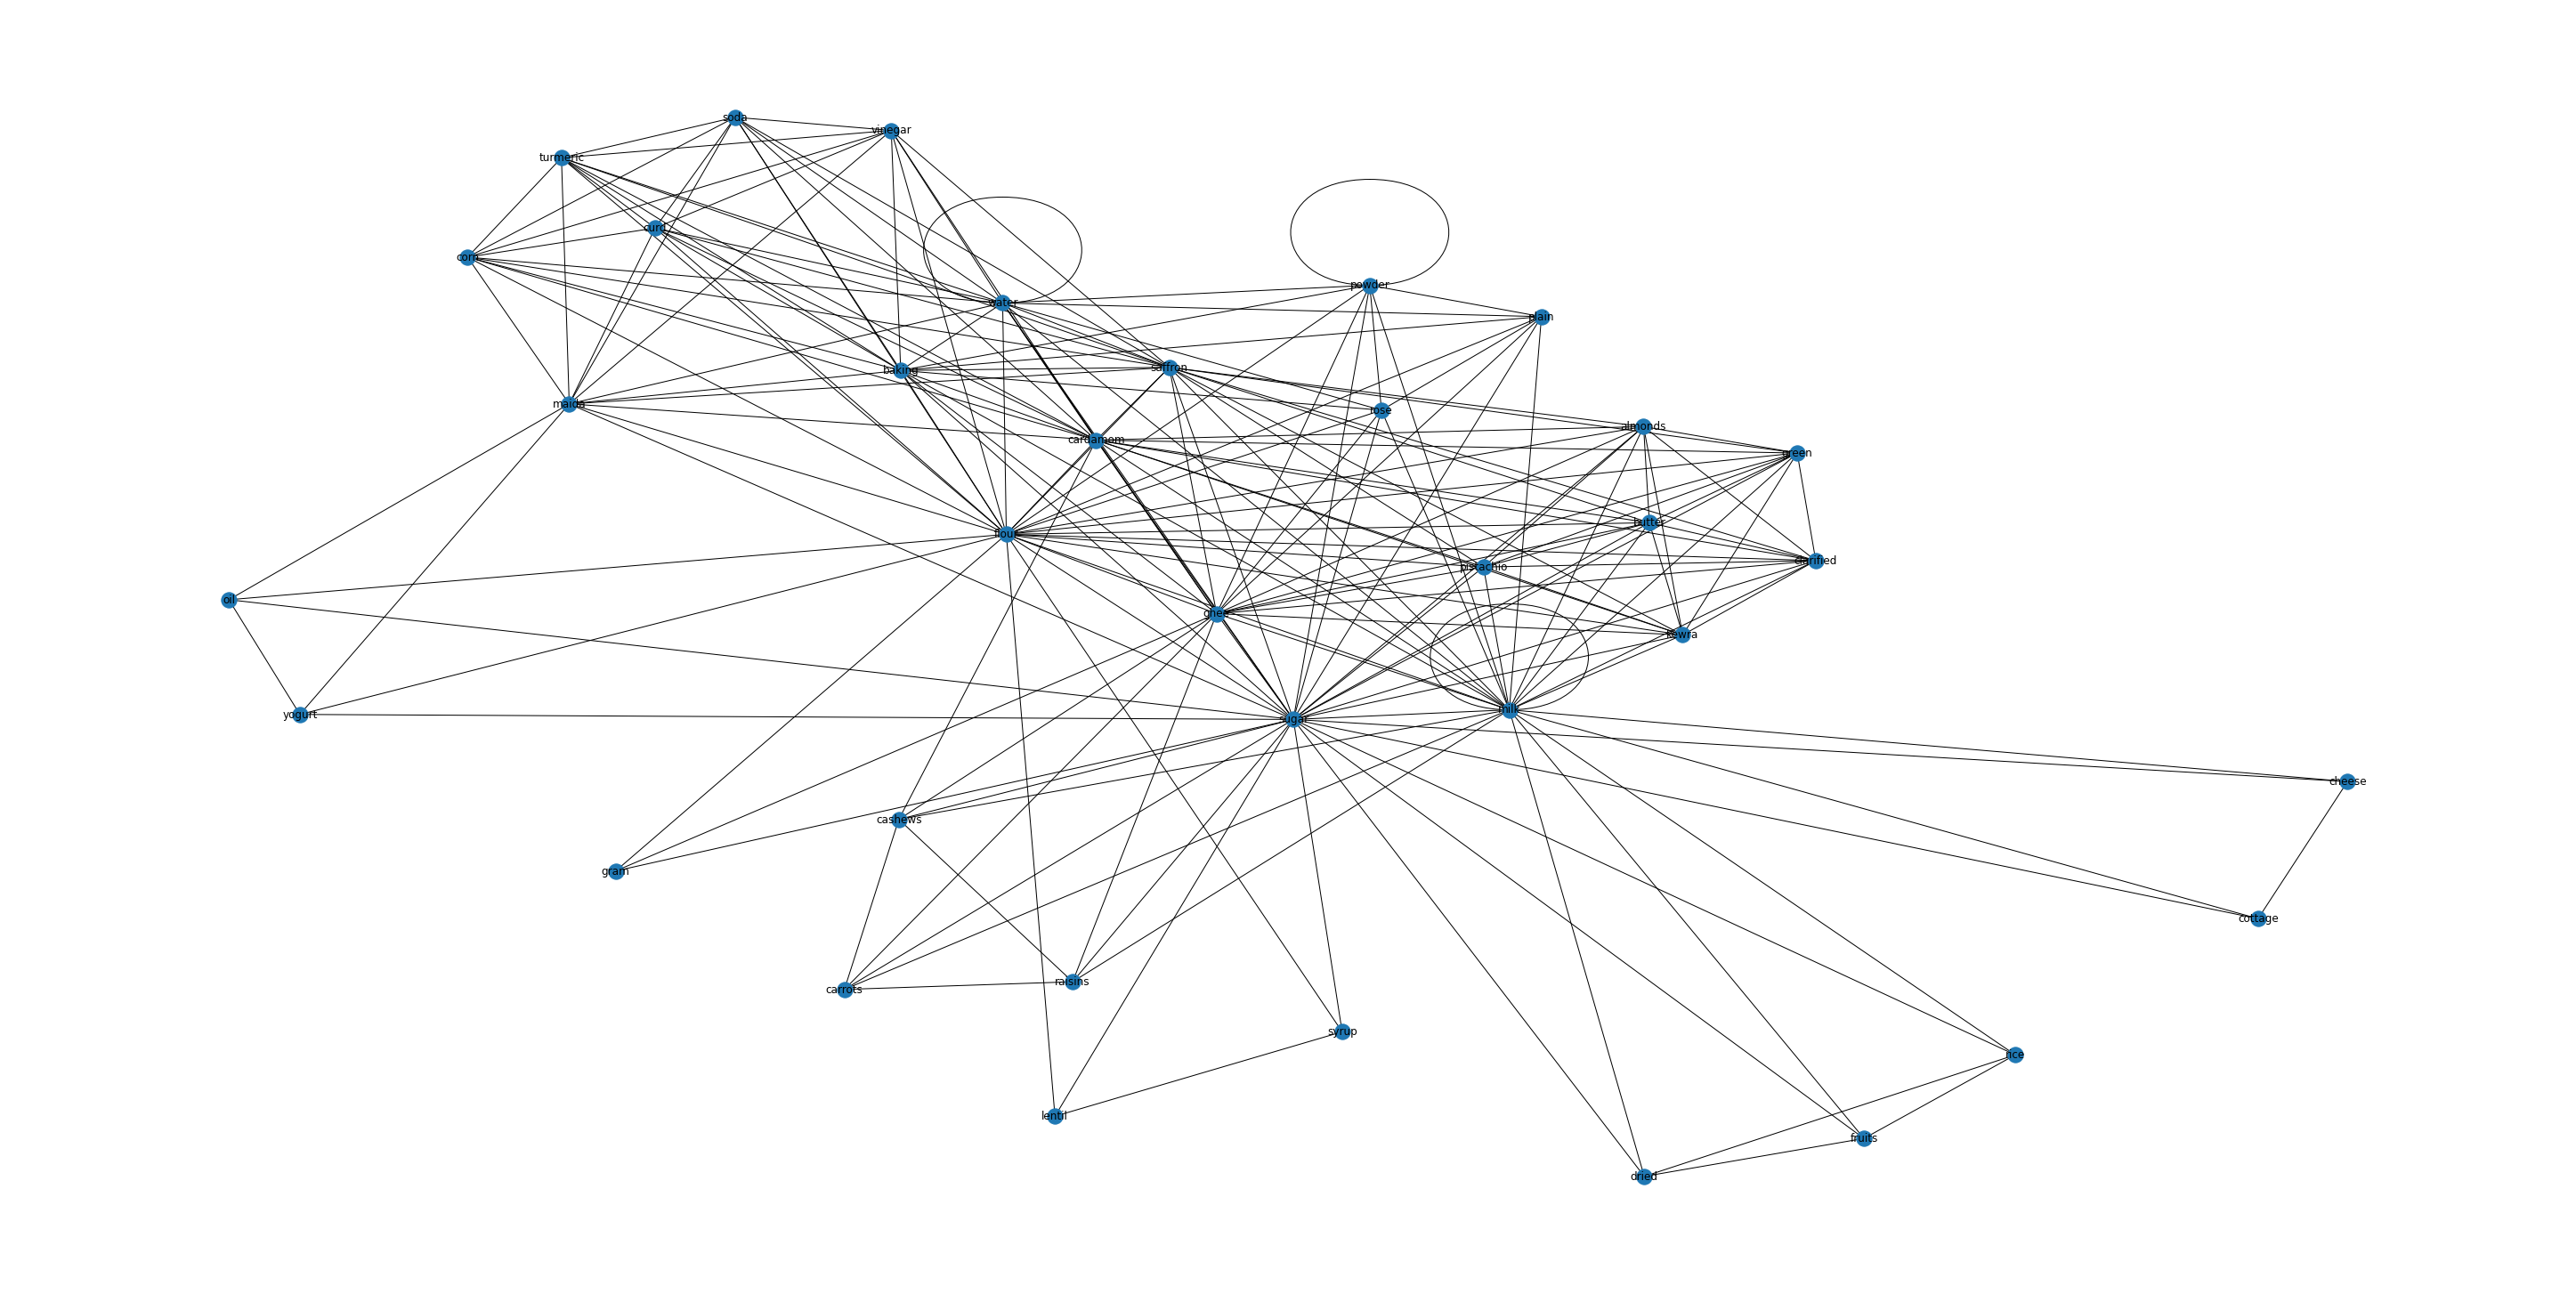

In [97]:
plt.figure(figsize=(40,20))
nx.draw(G, with_labels=True)  # networkx draw()
plt.show()  # pyplot draw()

## Попробуем разные лэйауты:

draw_networkx_nodes(G)

draw_networkx_edges(G)

draw_networkx_labels(G)


draw_circular(G)

draw_kamada_kawai(G)

draw_planar(G)

draw_random(G)

draw_spectral(G)

draw_spring(G)

draw_shell(G)

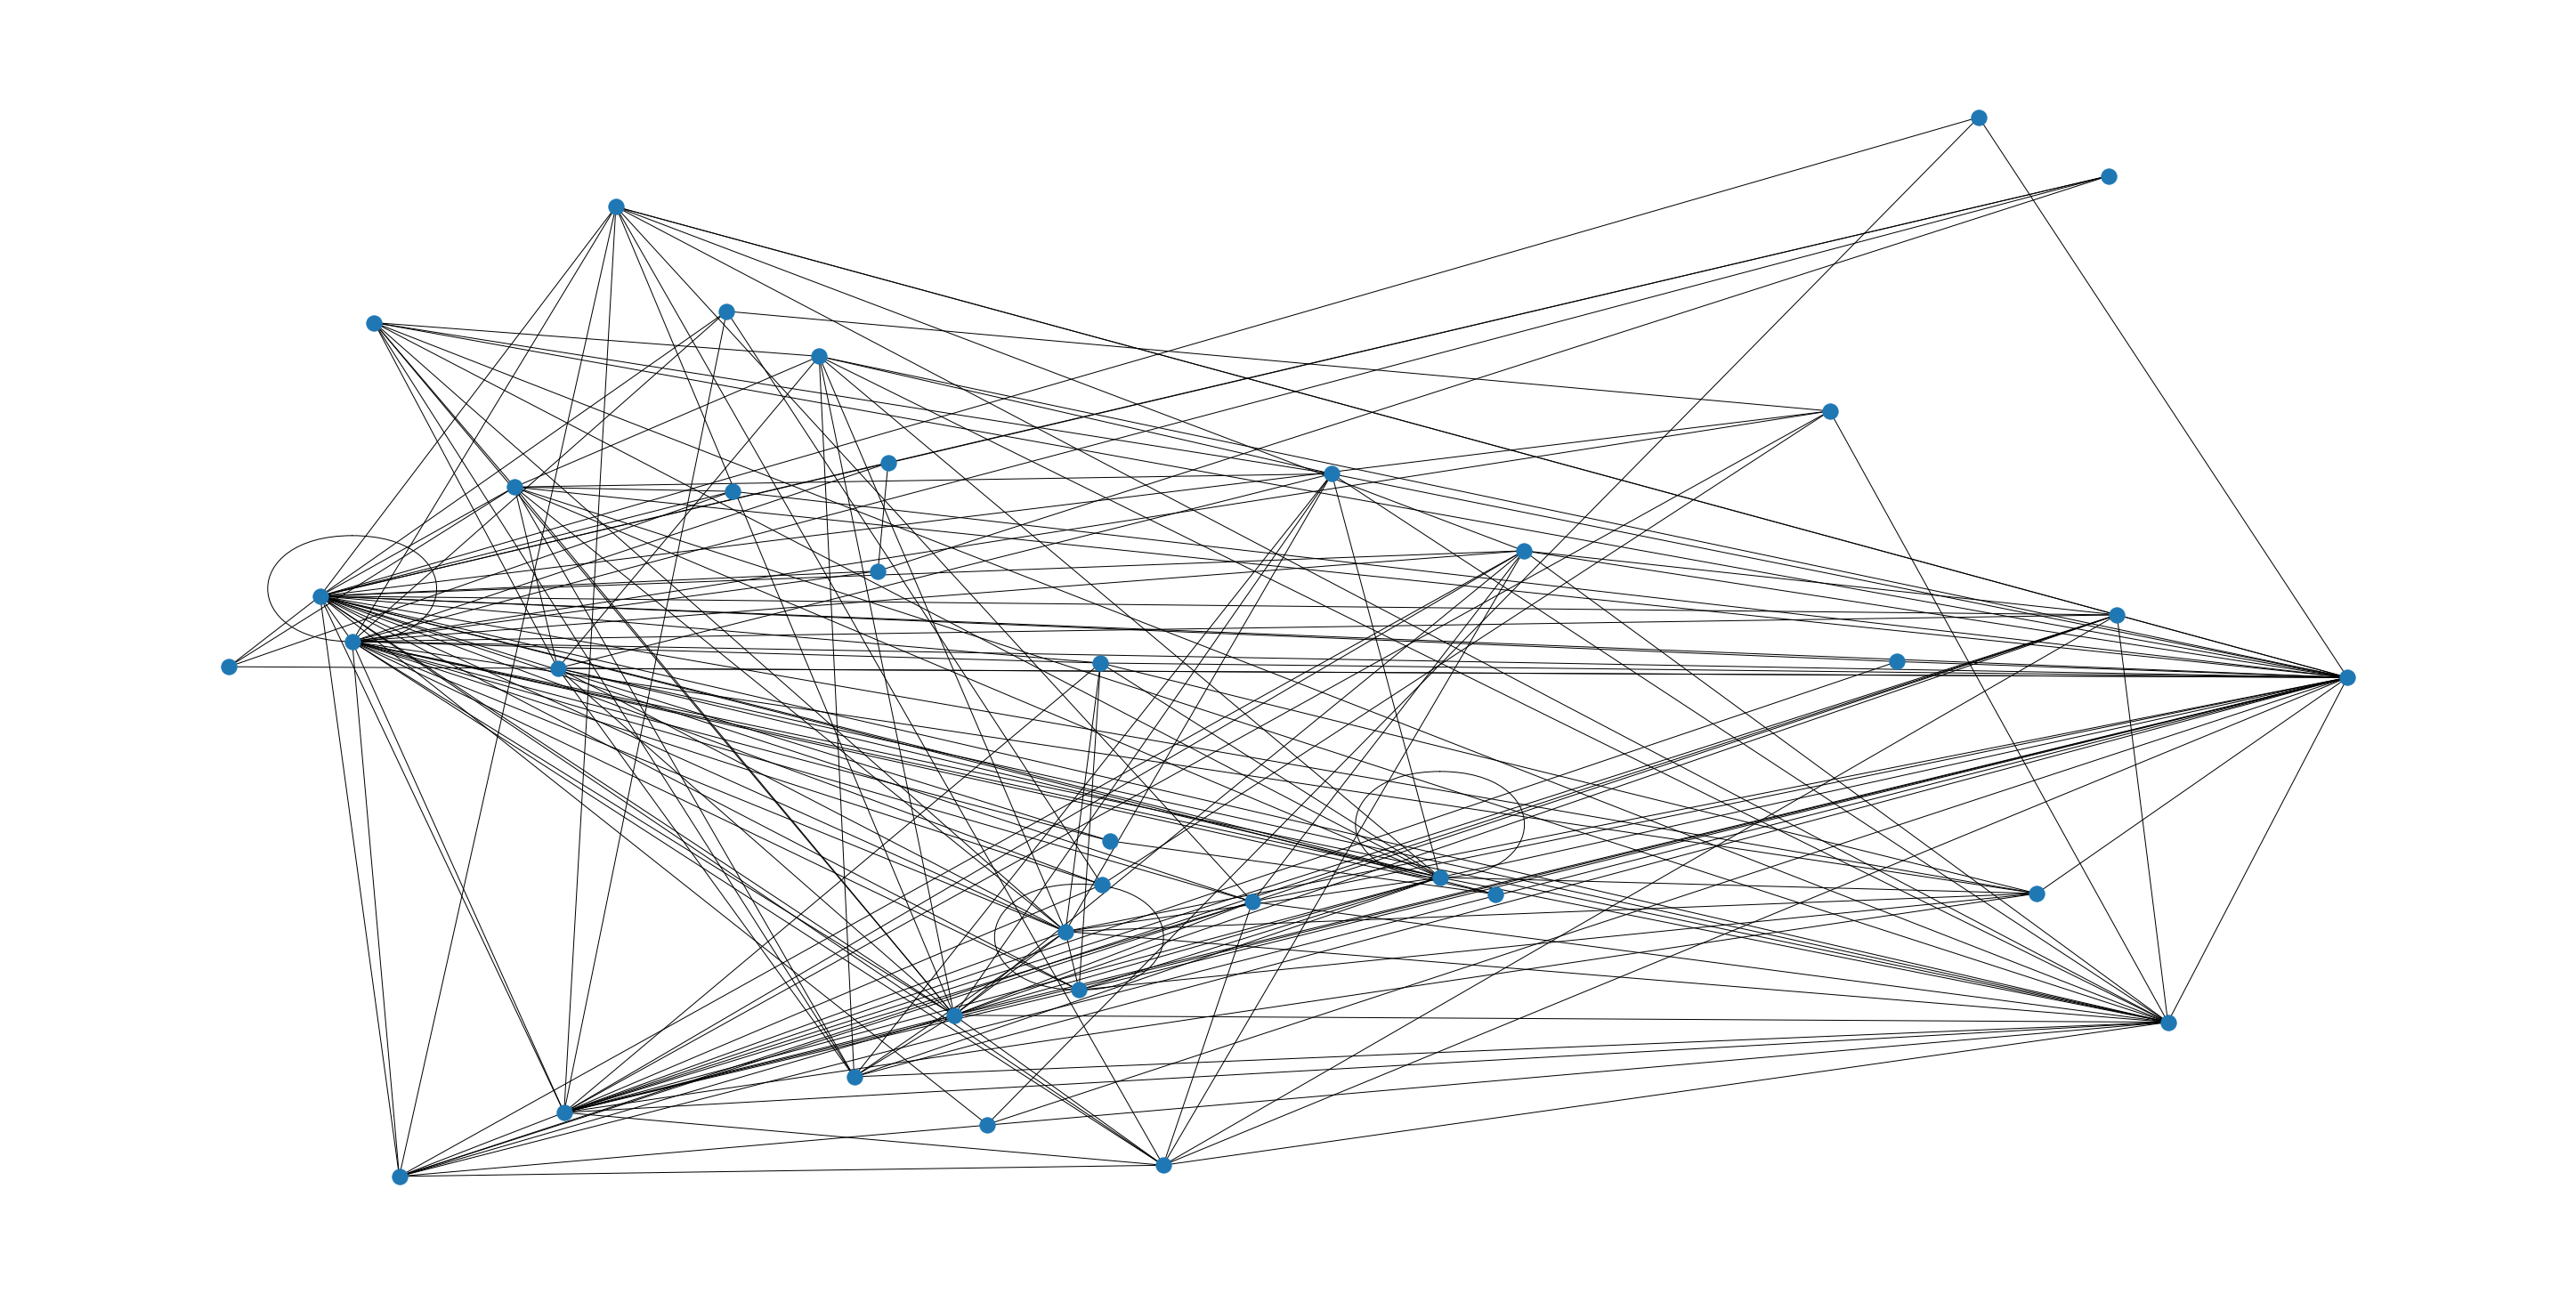

In [99]:
plt.figure(figsize=(40,20))
nx.draw_random(G)